In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Data Processing

Process NASA data for subsequent analysis using machine learning models.

In [40]:
# import data
df = pd.read_csv('processed.csv')

# drop unnecessary columns
df.drop(labels = ["index", "pha"], axis=1, inplace=True)

# replace Y/N with 1/0
df['neo'] = df['neo'].map({'Y':1,'N':0})

# type cast data
df = df.astype(float)

# remove outliers
for column in df:
    if column not in ["orbit_condition_code", "diameter","neo"]:
        df=df[(np.abs(stats.zscore(df[column])) < 3)]

# create nasa dataframe for subsequent analysis
df_nasa = df[df["albedo"] > 0]

# normalize data
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())
for column in df.columns:
    if column != 'diameter':
        df[column]=min_max_scaling(df[column])

# shuffle dataframe
df = df.sample(frac = 1)

# split dataframe into train and test
split_index = int(df.shape[0] * 0.8)
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

# split train and test into X and Y
Y_train = df_train['diameter']
Y_test = df_test['diameter']
X_train = df_train.drop(labels = 'diameter', axis=1)
X_test = df_test.drop(labels = 'diameter', axis=1)

/var/folders/bd/kfz6tvds4_bfgj09gr0wlj780000gn/T/ipykernel_28268/2922929086.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('processed.csv')


# Data Modelling

Create and test four machine learning models to optimize prediction of asteroid diameter:
1. multilayer perceptron;
2. random forest;
3. linear regression; and
4. k-nearest neighbours.

### Multilayer Perceptron (MLP) Neural Network

In [22]:
# fit multilayer perceptron regressor to training data
model = MLPRegressor(learning_rate_init = 0.002, max_iter = 300)
model.fit(X_train, Y_train)

MLPRegressor(learning_rate_init=0.002, max_iter=300)

In [23]:
# accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, model.predict(X_test))
mse = metrics.mean_squared_error(Y_test, model.predict(X_test))
rsq = metrics.r2_score(Y_test, model.predict(X_test))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Ypred = model.predict(X_test)
MLPPred = Ypred

Mean Absolute Error: 0.31754346586610827
Mean Squared Error: 0.25516818096902993
R2 Score: 0.9630019110564803


Text(0, 0.5, 'Diameter: Predicted value')

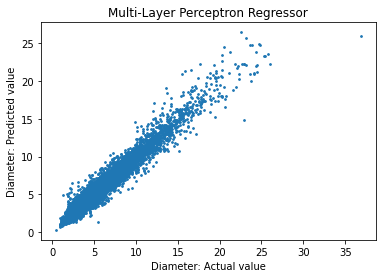

In [24]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Ypred)
plt.scatter(x, y, s = 3)
plt.title("Multi-Layer Perceptron Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

### Random Forest Algorithm

In [25]:
# fit random forest regressor to training data
model = RandomForestRegressor(n_estimators = 400, max_features = 5, max_depth = 6)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [26]:
# accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, pred)
mse = metrics.mean_squared_error(Y_test, pred)
rsq = metrics.r2_score(Y_test, pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.4942852893141853
Mean Squared Error: 0.5088620101266588
R2 Score: 0.9262175956298823


0.5088620101266588


Text(0, 0.5, 'Diameter: Predicted value')

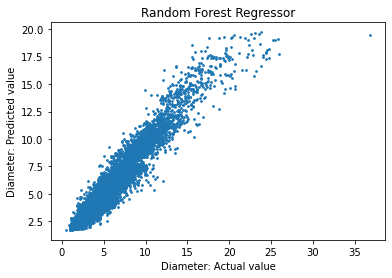

In [27]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(pred)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s = 3)
plt.title("Random Forest Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

### Linear Regression

In [28]:
# linear regression model
lr = LinearRegression()

# training
lr.fit(X_train, Y_train)

# predicting
Y_prediction_lr = lr.predict(X_test)

In [29]:
# accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, Y_prediction_lr)
mse = metrics.mean_squared_error(Y_test, Y_prediction_lr)
rsq = metrics.r2_score(Y_test, Y_prediction_lr)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.7356881994234334
Mean Squared Error: 1.2599265772091595
R2 Score: 0.8173170518798087


Text(0, 0.5, 'Diameter: Predicted value')

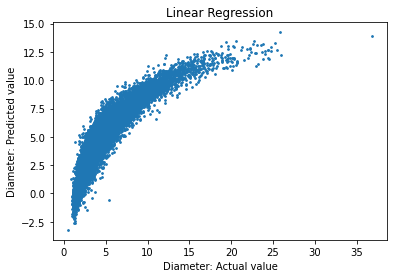

In [30]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Y_prediction_lr)
plt.scatter(x, y, s = 3)
plt.title("Linear Regression")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

### k-Nearest Neighbours Algorithm

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [32]:
# accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rsq = metrics.r2_score(Y_test,Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.4034770626997593
Mean Squared Error: 0.4185670208925542
R2 Score: 0.9393099100013321


0.4185670208925542


Text(0, 0.5, 'Diameter: Predicted value')

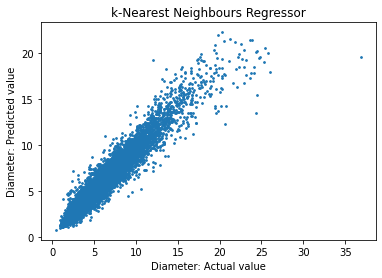

In [33]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Y_pred)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s = 3)
plt.title("k-Nearest Neighbours Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

# Analysis of NASA Formula

Compare predictions of asteroid diameter from NASA's formula compared to measured values in dataframe.

In [34]:
# define NASA data
X = df_nasa.drop(labels='diameter',axis=1)
Y = df_nasa["diameter"]

# NASA formula
nasa_diameter = (10 ** (3.1236-0.5*np.log10(X["albedo"]) - 0.2 * X["absolute_magnitude"]))

In [35]:
# accuracy metrics on test data
mae = metrics.mean_absolute_error(Y,nasa_diameter)
mse = metrics.mean_squared_error(Y,nasa_diameter)
rsq = metrics.r2_score(Y,nasa_diameter)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.4083328067236096
Mean Squared Error: 0.4031058770606292
R2 Score: 0.9409221602188128


0.4031058770606292


Text(0, 0.5, 'Diameter: Predicted value')

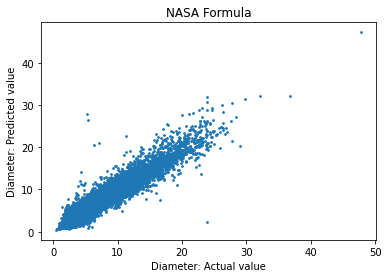

In [36]:
# plot actual values against expected values
x = np.array(Y)
y = np.array(nasa_diameter)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s = 3)
plt.title("NASA Formula")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")